### FE630 - Homework #2

**Author**: Sid Bhatia

**Date**: May 7th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Papa Momar Ndiaye

#### Topics

- Algebra & Optimization;
- Geometry of Efficient Frontiers;
- Applications of One-Fund & Two-Fund Theorems.

### P1 - Optimization w/Equality Constraints (40 pts)

Consider the optimization problem **Max Expected Return w/Target Risk**:

$$
\begin{cases}
\underset{\omega_1, \omega_2}{\max} & R_p (\omega_1, \omega_2) = \mu_1 \omega_1 + \mu_2 \omega_2 \tag{1} \\
\text{s.t.} & \sqrt{\sigma_1^2 \omega_1^2 + 2 \rho_{1, 2} \sigma_1 \sigma_2 \omega_1 \omega_2 + \sigma_2^2 \omega_2^2} = \sigma_T \\
& \omega_1 + \omega_2 = 1
\end{cases}
$$

where we have two securities with **Expected Returns** $ \mu_1 $ and $ \mu_2 $ for the column vector $ (\mu_1, \mu_2)^\intercal \in \mathbb{R}^{2 \times 1} $, **volatilities** $ (\sigma_1, \sigma_2) \in \mathbb{R}^{+} $, and **Pearson correlation coefficient** $ \rho_{1, 2} \in [-1, 1] $. Additionally, $ \sigma_T \in \mathbb{R}^+ $ denotes the **target risk/vol**.

1. Solve the *problem (3)* using a **Lagrangian approach**. You will denote the solution (the ***optimal solution***) by $\omega^*(\sigma_T)$ and the ***optimal value*** of the problem by $R_p(\omega_1^*(\sigma_T), \omega_2^*(\sigma_T))$ by $R_p(\sigma_T)$.

2. Assume that $\mu_1 = 5\%$, $\mu_2 = 10\%$, $\sigma_1 = 10\%$, $\sigma_2 = 20\%$, and $\rho_{1,2} = -0.5$ (moderate negative correlation). 

- Consider a sequence of successive values of $\sigma_T$ in the range $[2\%, 30\%]$ by step of $0.5\%$
- Plot the efficient frontier: namely, the graph from the *mapping* $\sigma_T \mapsto R_p(\sigma_T)$.

The (aforementioned) graph maps the sequence of values of $\sigma_T$ from the $x$-axis into the sequence of values $R_p(\sigma_T)$ on the $y$-axis.

#### 1. Lagrangian Solution

##### Problem Formulation

The given optimization problem is:

$$
\begin{cases}
\underset{x_1, x_2}{\max} & 5 - x_1^2 - x_1x_2 - 3x_2^2 \tag{2}
\\
\text{s.t.} & x_1, x_2 \geq 0
\\
& x_1 x_2 \geq 2
\end{cases}
$$

##### Lagrangian Formulation

The Lagrangian $\mathcal{L}$ for this problem includes the objective function and the constraints incorporated through Lagrange multipliers:

$$
\mathcal{L}(x_1, x_2, \lambda_1, \lambda_2, \lambda_3) = 5 - x_1^2 - x_1x_2 - 3x_2^2 + \lambda_1 x_1 + \lambda_2 x_2 + \lambda_3 (x_1 x_2 - 2) \tag{3}
$$

Here, $\lambda_1$, $\lambda_2$, and $\lambda_3$ are the Lagrange multipliers.

##### Lagrangian Partial Derivatives

To find the stationary points, we take the partial derivatives of $\mathcal{L}$ and set them to zero:

$$
\frac{\partial \mathcal{L}}{\partial x_1} = -2x_1 - x_2 + \lambda_1 + \lambda_3 x_2 = 0 \tag{4}
$$
$$
\frac{\partial \mathcal{L}}{\partial x_2} = -x_1 - 6x_2 + \lambda_2 + \lambda_3 x_1 = 0 \tag{5}
$$

##### Complementary Slackness

KKT conditions also include complementary slackness:

$$
\lambda_1 x_1 = 0, \quad \lambda_2 x_2 = 0, \quad \lambda_3 (x_1 x_2 - 2) = 0 \tag{6}
$$

#### 2. Efficient Frontier Mapping

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [5]:
from typing import Tuple, List

# Constants
mu1: float = 0.05  # Expected return of the first security
mu2: float = 0.10  # Expected return of the second security
sigma1: float = 0.10  # Volatility of the first security
sigma2: float = 0.20  # Volatility of the second security
rho: float = -0.5  # Correlation coefficient between the securities

# Target risk values
sigma_T_values: np.ndarray = np.arange(0.02, 0.305, 0.005)

In [9]:
def portfolio_return(weights: np.ndarray, mu1: float, mu2: float) -> float:
    """
    Calculate the portfolio return based on given weights and expected returns.
    
    Parameters:
        weights (np.ndarray): Array of weights for the securities.
        mu1 (float): Expected return of the first security.
        mu2 (float): Expected return of the second security.
    
    Returns:
        float: The calculated portfolio return.
    """
    return weights[0] * mu1 + weights[1] * mu2

In [12]:
def portfolio_risk(weights: np.ndarray, sigma1: float, sigma2: float, rho: float) -> float:
    """
    Calculate the portfolio risk based on weights, individual volatilities, and correlation.
    
    Parameters:
        weights (np.ndarray): Array of weights for the securities.
        sigma1 (float): Volatility of the first security.
        sigma2 (float): Volatility of the second security.
        rho (float): Correlation coefficient between the securities.
    
    Returns:
        float: The calculated portfolio risk.
    """
    return np.sqrt((sigma1 * weights[0]) ** 2 + (sigma2 * weights[1]) ** 2 + 
                   2 * rho * sigma1 * sigma2 * weights[0] * weights[1])

In [14]:
def objective(weights: np.ndarray) -> float:
    """
    Objective function for minimization, used to maximize portfolio return.
    
    Parameters:
        weights (np.ndarray): Array of weights for the securities.
    
    Returns:
        float: Negative of the portfolio return (for minimization).
    """
    return -portfolio_return(weights, mu1, mu2)

In [16]:
def constraint(weights: np.ndarray, sigma_T: float) -> float:
    """
    Constraint for the optimizer to achieve a specific target risk.
    
    Parameters:
        weights (np.ndarray): Array of weights for the securities.
        sigma_T (float): Target risk level.
    
    Returns:
        float: Difference between current and target risks.
    """
    return portfolio_risk(weights, sigma1, sigma2, rho) - sigma_T

In [17]:
results_rp: List[float] = []

for sigma_T in sigma_T_values:
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'eq', 'fun': lambda x: constraint(x, sigma_T)})
    bounds: Tuple[Tuple[float, float], Tuple[float, float]] = ((0, 1), (0, 1))
    initial_weights: List[float] = [0.5, 0.5]
    result = minimize(objective, initial_weights, bounds=bounds, constraints=cons)
    results_rp.append(-result.fun)

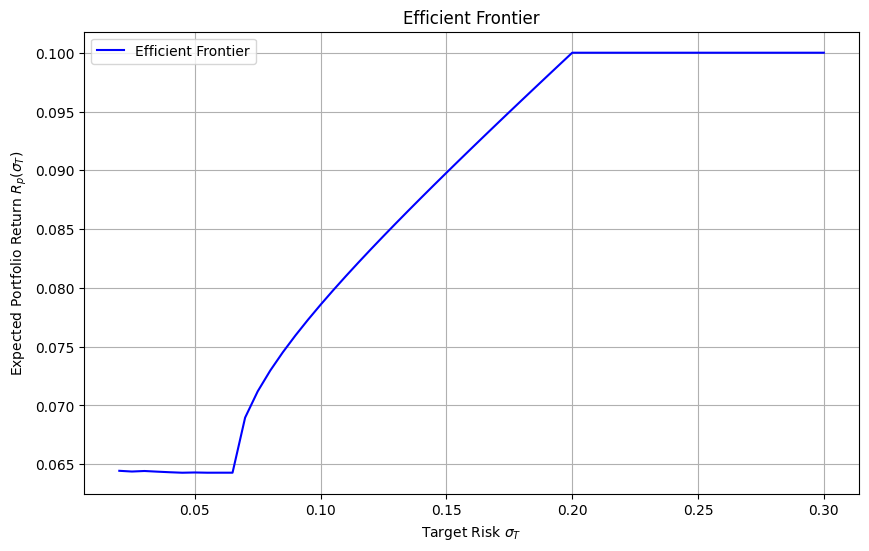

In [18]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(sigma_T_values, results_rp, 'b-', label='Efficient Frontier')
plt.title('Efficient Frontier')
plt.xlabel('Target Risk $\sigma_T$')
plt.ylabel('Expected Portfolio Return $R_p(\sigma_T)$')
plt.grid(True)
plt.legend()
plt.show()

##### Frontier Analysis

The graph above depicts the relationship between the target risk ($\sigma_T$) and the expected portfolio return ($R_p(\sigma_T)$). Below are the key takeaways:

1. ***Monotonic Increase***: As expected, the expected portfolio return increases with an increase in target risk, $\sigma_T$. This reflects the classic **risk-return trade-off** in portfolio management.

2. ***Plateau at Higher Risks***: The plateau observed at higher risk levels suggests that increasing risk beyond a certain point does **not proportionally increase returns**. This could be indicative of the constraints imposed by the maximum returns achievable based on the securities' parameters.

3. ***Sharp Rise at Lower Risks***: The initial sharp rise suggests that minimal increases in risk from the lower end are highly compensated by increased returns. This can be attributed to the efficient allocation of weights in response to changes in $\sigma_T$ under the given constraints.

#### Optimization w/Inequality Constraints (20 pts)

Solve analytically (at least) one of the two following problems:

$$
\begin{cases}
\underset{x_1, x_2} \max & (x_1 - 2)^2 + 2(x_2 - 1)^2 \tag{2}
\\
\text{s.t} & x_1 + 4x_2 \leq 3
\\
& x_1 \geq x_2
\end{cases}
$$

$$
\begin{cases}
\underset{x_1, x_2} \max & 5 - x_1^2 - x_1x_2 - 3x_2^2 \tag{3}
\\
\text{s.t} & x_1, x_2 \geq 0
\\
& x_1 x_2 \geq 2
\end{cases}
$$

and use an optimizer to verify your answer.